In [2]:
# module import
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast

In [3]:
data_folder = "Data"
lob_subfolder = "LOBs"
tapes_subfolder = "Tapes"

# filename style
# UoB_Set01_2025-01-02LOBs
# UoB_Set01_2025-01-02tapes

LOB_filenames = os.listdir(data_folder + '\\' + lob_subfolder)
Tapes_filenames = os.listdir(data_folder + '\\' + tapes_subfolder)

print("LOB files\n", LOB_filenames)
print("Tapes files\n", Tapes_filenames)

LOB files
 ['UoB_Set01_2025-01-02LOBs.txt', 'UoB_Set01_2025-01-03LOBs.txt', 'UoB_Set01_2025-01-06LOBs.txt', 'UoB_Set01_2025-01-07LOBs.txt', 'UoB_Set01_2025-01-08LOBs.txt', 'UoB_Set01_2025-01-09LOBs.txt', 'UoB_Set01_2025-01-10LOBs.txt', 'UoB_Set01_2025-01-13LOBs.txt', 'UoB_Set01_2025-01-14LOBs.txt', 'UoB_Set01_2025-01-15LOBs.txt', 'UoB_Set01_2025-01-16LOBs.txt', 'UoB_Set01_2025-01-17LOBs.txt', 'UoB_Set01_2025-01-20LOBs.txt', 'UoB_Set01_2025-01-21LOBs.txt', 'UoB_Set01_2025-01-22LOBs.txt', 'UoB_Set01_2025-01-23LOBs.txt', 'UoB_Set01_2025-01-24LOBs.txt', 'UoB_Set01_2025-01-27LOBs.txt', 'UoB_Set01_2025-01-28LOBs.txt', 'UoB_Set01_2025-01-29LOBs.txt', 'UoB_Set01_2025-01-30LOBs.txt', 'UoB_Set01_2025-01-31LOBs.txt', 'UoB_Set01_2025-02-03LOBs.txt', 'UoB_Set01_2025-02-04LOBs.txt', 'UoB_Set01_2025-02-05LOBs.txt', 'UoB_Set01_2025-02-06LOBs.txt', 'UoB_Set01_2025-02-07LOBs.txt', 'UoB_Set01_2025-02-10LOBs.txt', 'UoB_Set01_2025-02-11LOBs.txt', 'UoB_Set01_2025-02-12LOBs.txt', 'UoB_Set01_2025-02-13LOBs.tx

In [4]:
raw_LOBs = []

for filename in LOB_filenames:
    print(f"Opening {filename}")
    if filename[:10] != "UoB_Set01_":
        print("Invalid Filename:", filename)
    else:
        date = filename[10:20]
        
        with open(data_folder + "\\" + lob_subfolder + "\\" + filename, 'r') as f:
            lob_raw = f.readlines()

        lob_list = [ast.literal_eval(a.replace("Exch0", "'Exch0'")) for a in lob_raw]

        df = pd.DataFrame(lob_list)

        column_mapping = {
            0 : "Seconds",
            1 : "Exchange",
            2 : "LOB",
        }

        df.rename(columns = column_mapping, inplace = True)

        df['Date'] = pd.to_datetime(date)

        raw_LOBs.append(df)


Opening UoB_Set01_2025-01-02LOBs.txt
Opening UoB_Set01_2025-01-03LOBs.txt
Opening UoB_Set01_2025-01-06LOBs.txt


In [24]:
raw_tapes = []
for filename in Tapes_filenames:
    print(f"Opening {filename}")
    if filename[:10] != "UoB_Set01_":
        print("Invalid Filename:", filename)
    else:
        date = filename[10:20]
        
        df = pd.read_csv(data_folder + "\\" + tapes_subfolder + "\\" + filename, header = None)

        column_mapping = {
            0 : "Seconds",
            1 : "Price",
            2 : "Volume",
        }

        df.rename(columns = column_mapping, inplace = True)

        df['Date'] = pd.to_datetime(date)
        
        raw_tapes.append(df)

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv


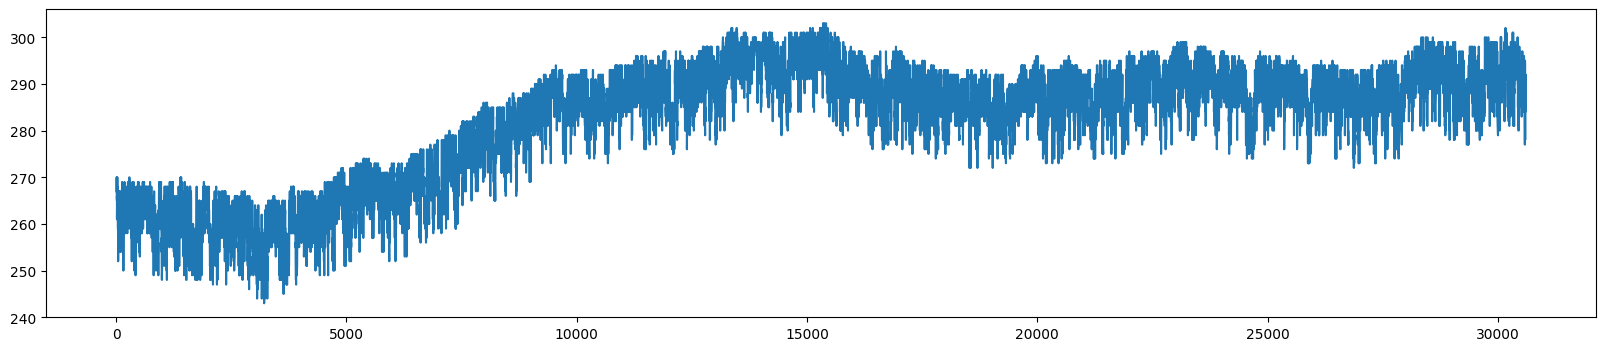

In [28]:
plt.figure(figsize = (20,4))
plt.plot(raw_tapes[0]["Seconds"], raw_tapes[0]["Price"])

In [54]:
def get_LOBask(LOB):
    if len(LOB[1][1]) > 0:  
        return LOB[1][1][0][0]
    else:
        return np.nan

for i, row in raw_LOBs[0].iterrows():
    raw_LOBs[0].loc[i, "low_ask"] = get_LOBask(row["LOB"])

In [55]:
raw_LOBs[0]

,Seconds,Exchange,LOB,Date,bid,low_ask
0,0.000,Exch0,"[[bid, []], [ask, []]]",2025-01-02,NaN,NaN
1,0.279,Exch0,"[[bid, [[1, 6]]], [ask, []]]",2025-01-02,NaN,NaN
2,1.333,Exch0,"[[bid, [[1, 6]]], [ask, [[800, 1]]]]",2025-01-02,NaN,800.0
3,1.581,Exch0,"[[bid, [[1, 6]]], [ask, [[799, 1]]]]",2025-01-02,NaN,799.0
4,1.643,Exch0,"[[bid, [[1, 6]]], [ask, [[798, 1]]]]",2025-01-02,NaN,798.0
...,...,...,...,...,...,...
352965,30599.542,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",2025-01-02,NaN,294.0
352966,30599.573,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",2025-01-02,NaN,294.0
352967,30599.635,Exch0,"[[bid, [[290, 1], [288, 2], [281, 4], [278, 1]...",2025-01-02,NaN,294.0
352968,30599.759,Exch0,"[[bid, [[288, 1], [281, 4], [278, 1], [270, 4]...",2025-01-02,NaN,294.0


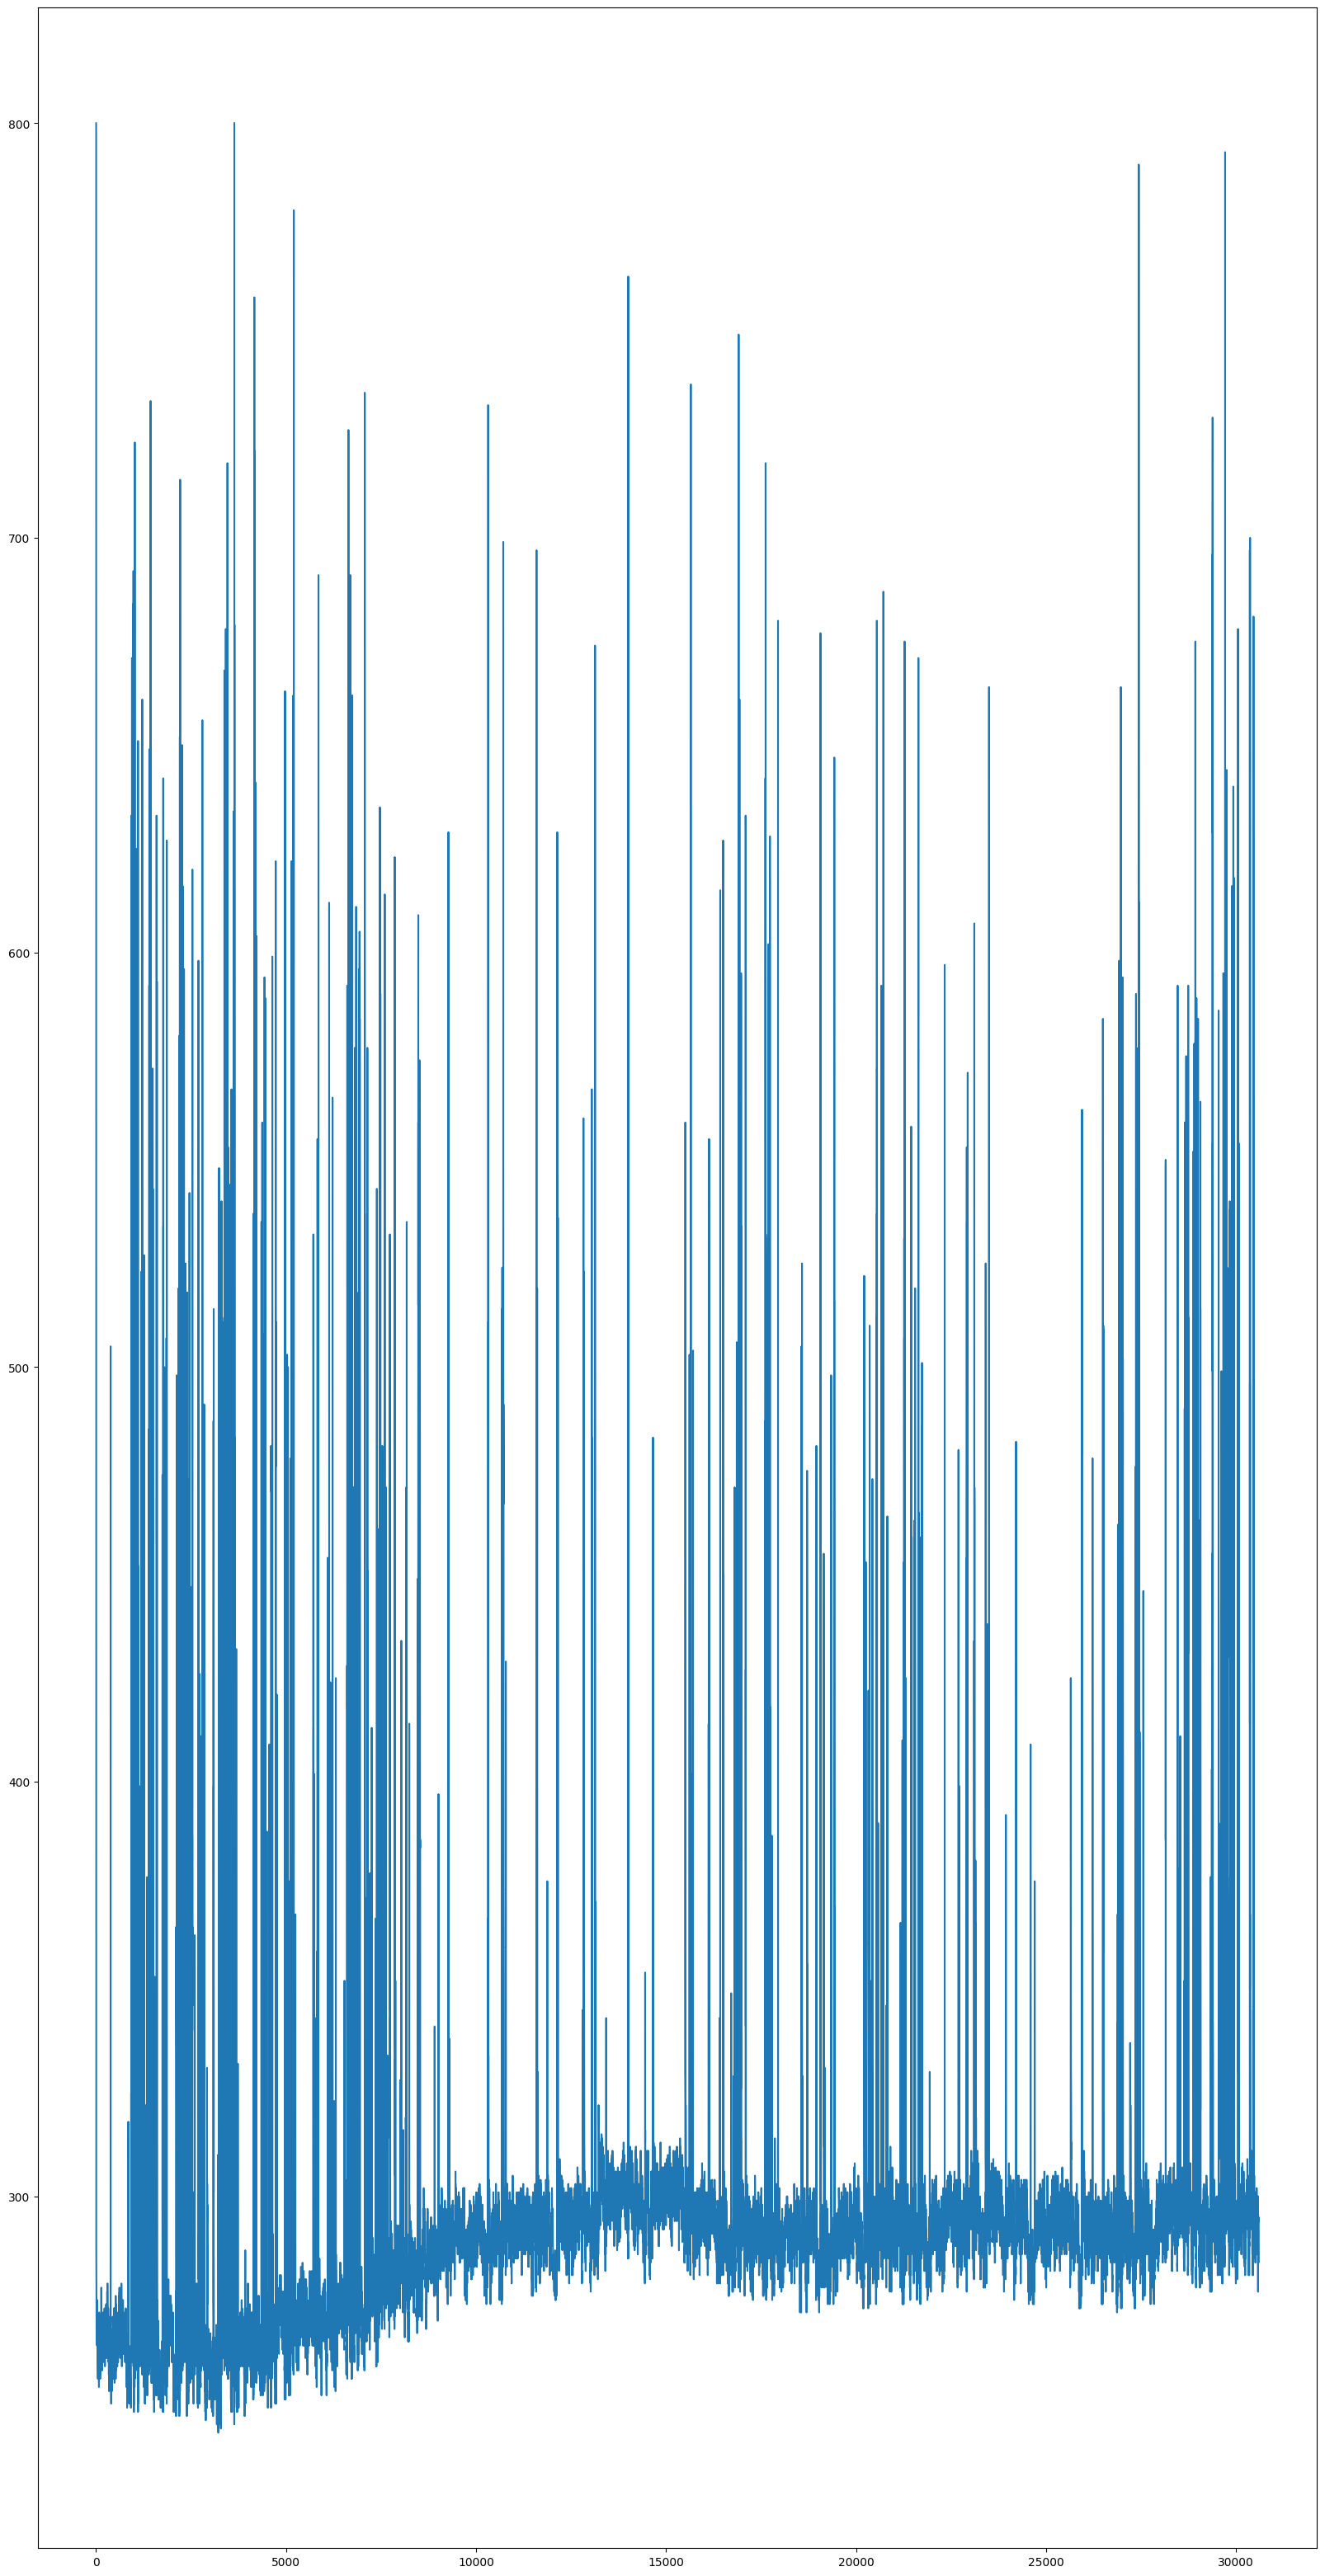

In [58]:
plt.figure(figsize = (20,40))
plt.plot(raw_LOBs[0]["Seconds"], raw_LOBs[0]["low_ask"])

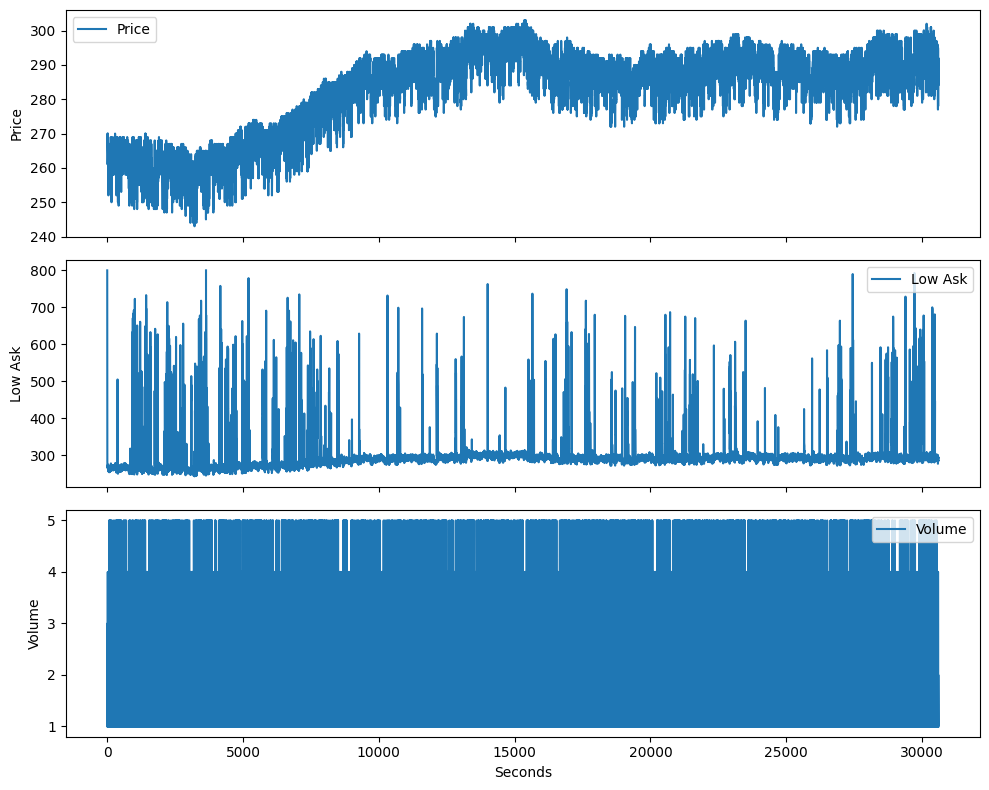

In [60]:
import matplotlib.pyplot as plt

# Assuming raw_tapes[0] and raw_LOBs[0] are your DataFrames
# You might need to adjust this part based on your actual DataFrame structure

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot Price on the first subplot
axs[0].plot(raw_tapes[0]["Seconds"], raw_tapes[0]["Price"], label='Price')
axs[0].set_ylabel('Price')

# Plot low_ask on the second subplot
axs[1].plot(raw_LOBs[0]["Seconds"], raw_LOBs[0]["low_ask"], label='Low Ask')
axs[1].set_ylabel('Low Ask')

# Plot Volume on the third subplot
axs[2].plot(raw_tapes[0]["Seconds"], raw_tapes[0]["Volume"], label='Volume')
axs[2].set_ylabel('Volume')
axs[2].set_xlabel('Seconds')

# Add legends to each subplot
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


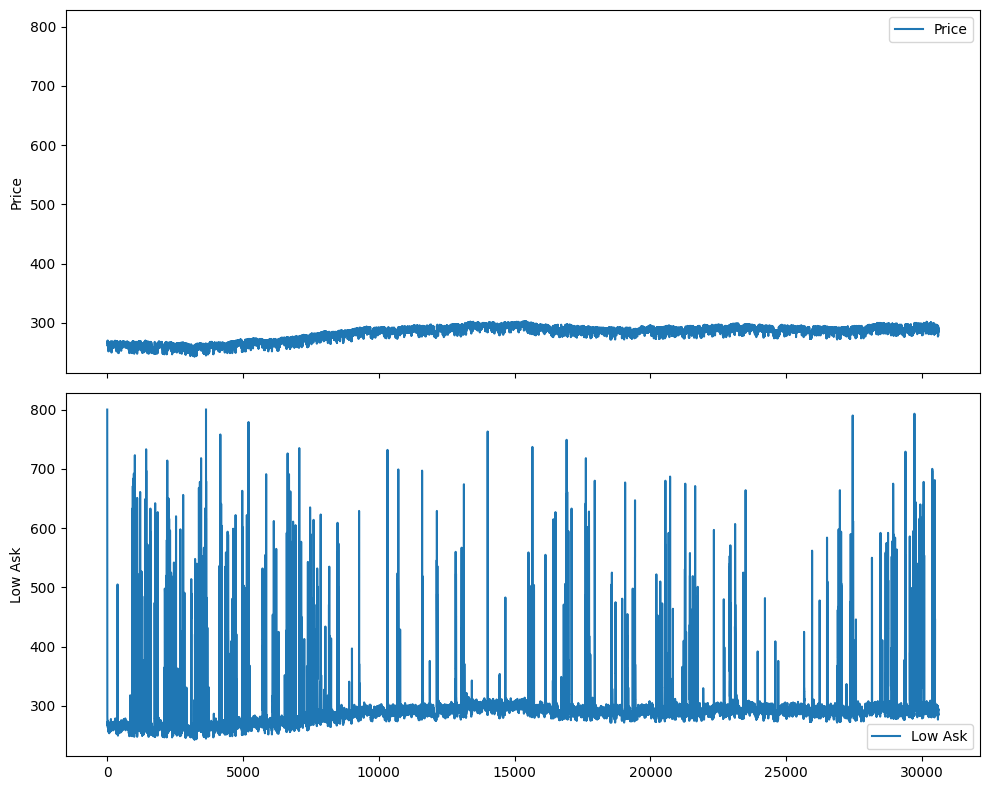

In [62]:
import matplotlib.pyplot as plt

# Assuming raw_tapes[0] and raw_LOBs[0] are your DataFrames
# You might need to adjust this part based on your actual DataFrame structure

# Create subplots with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True, sharey=True)

# Plot Price on the first subplot
axs[0].plot(raw_tapes[0]["Seconds"], raw_tapes[0]["Price"], label='Price')
axs[0].set_ylabel('Price')

# Plot low_ask on the second subplot
axs[1].plot(raw_LOBs[0]["Seconds"], raw_LOBs[0]["low_ask"], label='Low Ask')
axs[1].set_ylabel('Low Ask')

# Add legends to each subplot
axs[0].legend()
axs[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


In [64]:
raw_tapes[0]

,Seconds,Price,Volume,Date
0,10.881,267,1,2025-01-02
1,11.067,269,1,2025-01-02
2,11.222,267,2,2025-01-02
3,12.338,270,2,2025-01-02
4,13.733,267,3,2025-01-02
...,...,...,...,...
23806,30598.085,287,2,2025-01-02
23807,30598.085,288,2,2025-01-02
23808,30599.108,292,1,2025-01-02
23809,30599.728,290,1,2025-01-02


In [122]:
# Create a copy of the DataFrame to avoid modifying the original data
df = raw_tapes[0][["Seconds", "Price", "Volume"]].copy()

# Convert the 'Seconds' column to datetime format (assuming it's in seconds)
df['Time'] = pd.to_datetime(df['Seconds'] / 1, unit='s')

# Set the 'Time' column as the index
df.set_index('Time', inplace=True)

# Resample the data and sum the 'Volume' over 1-minute intervals
resampled_df = df.resample('1min').sum()

resampled_df["Real Price"] = resampled_df["Price"] / resampled_df["Volume"]

Text(0.5, 1.0, 'Volume')

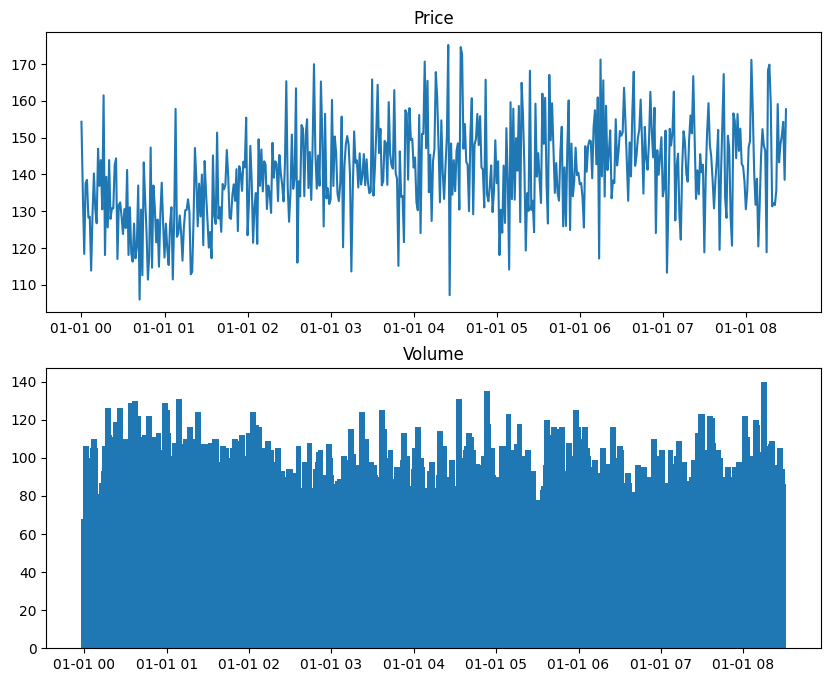

In [123]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(resampled_df["Real Price"])
axs[0].set_title("Price")
axs[1].bar(resampled_df.index,resampled_df["Volume"], width = 0.003)
axs[1].set_title("Volume")

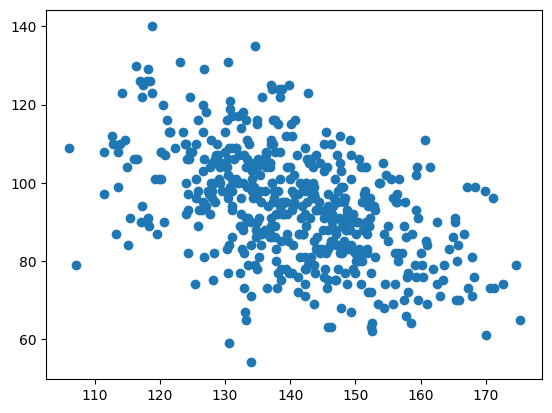

In [124]:
plt.plot(resampled_df["Real Price"],resampled_df["Volume"], 'o')